<a href="https://colab.research.google.com/github/AltnNyx/amigoSecretoAlura2/blob/main/AluraStoreLatam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importación de datos



In [ ]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



<function matplotlib.pyplot.show(close=None, block=None)>

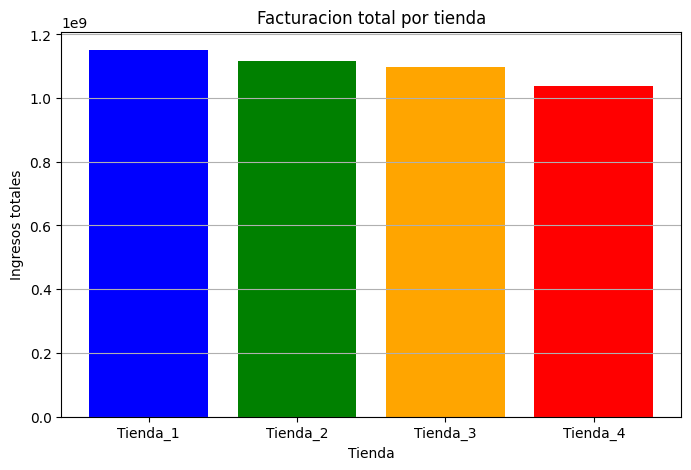

In [12]:
import matplotlib.pyplot as plt
import pandas as pd

##cargar datos
urls = [
    "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv",
    "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv",
    "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv",
    "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"
]

##diccionario de tiendas
tiendas = {f"Tienda_{i+1}":pd.read_csv(url) for i, url in enumerate(urls)}


ingresoXTienda = {nombre : df["Precio"].sum() for nombre, df in tiendas.items()}

##convertir a dataframe para graficar
df_ingresos = pd.DataFrame(list(ingresoXTienda.items()),columns=["Tienda","Ingresos"])

plt.figure(figsize=(8,5))
plt.bar(df_ingresos["Tienda"],df_ingresos["Ingresos"], color =['blue','green','orange','red'])
plt.title('Facturacion total por tienda')
plt.ylabel('Ingresos totales')
plt.xlabel('Tienda')
plt.grid(axis = 'y')
plt.show

# 2. Ventas por categoría

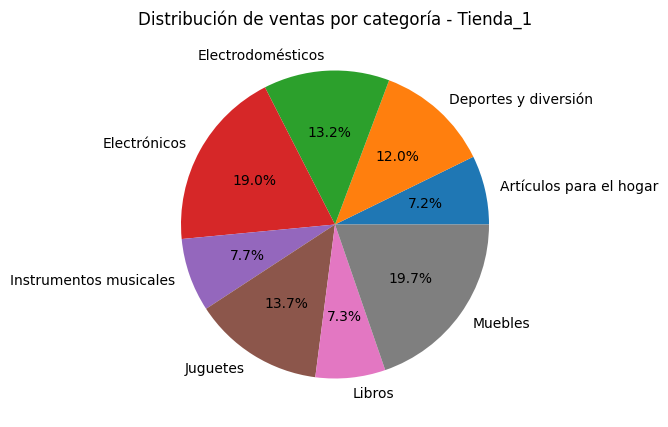

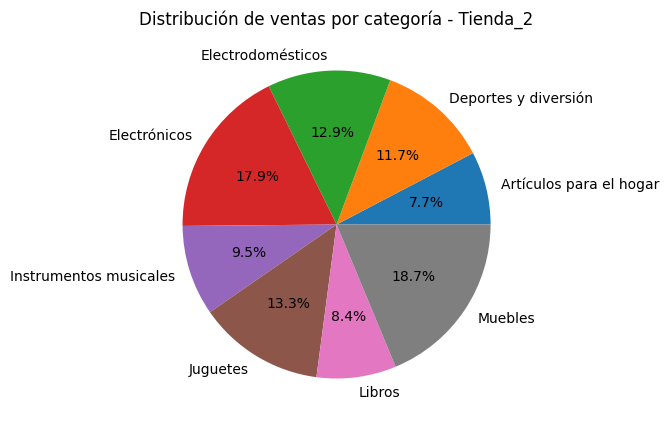

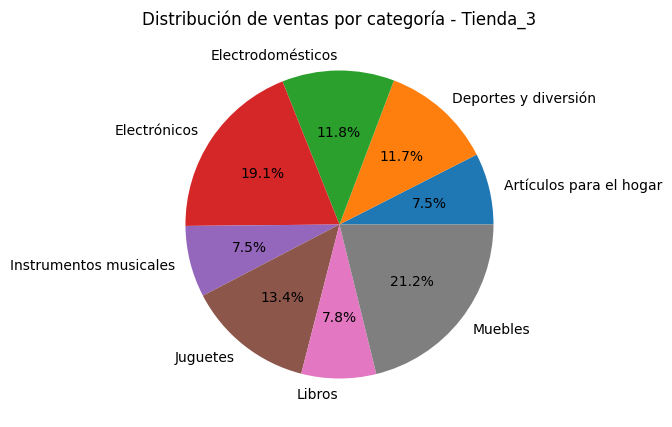

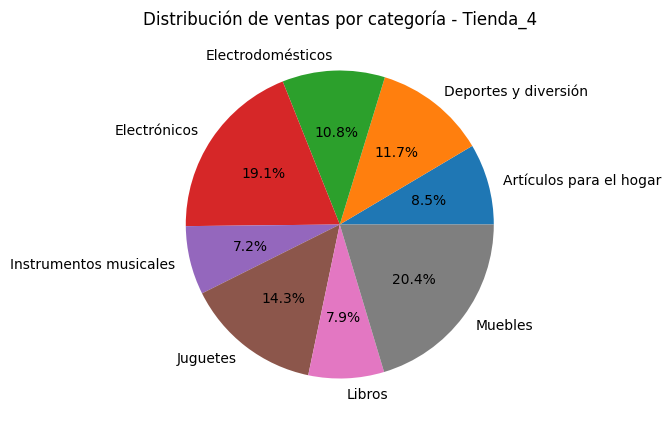

In [28]:
for nombre, df in tiendas.items():
  categorias = df.groupby("Categoría del Producto")["Precio"].count()
  plt.figure(figsize=(8,5))
  categorias.plot(kind='pie',autopct='%1.1f%%')
  plt.title(f"Distribución de ventas por categoría - {nombre}")
  plt.ylabel("")
  plt.show()

# 3. Calificación promedio de la tienda


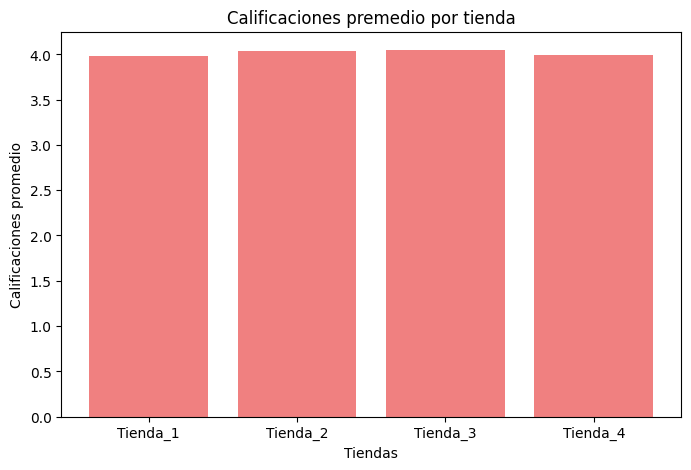

In [23]:
calificacionesXTienda = {nombre: df['Calificación'].mean() for nombre,df in tiendas.items()}
plt.figure(figsize=(8,5))
plt.bar(calificacionesXTienda.keys(),calificacionesXTienda.values(),color='lightcoral')
plt.xlabel("Tiendas")
plt.ylabel("Calificaciones promedio")
plt.title("Calificaciones premedio por tienda")
plt.show()

# 4. Productos más y menos vendidos

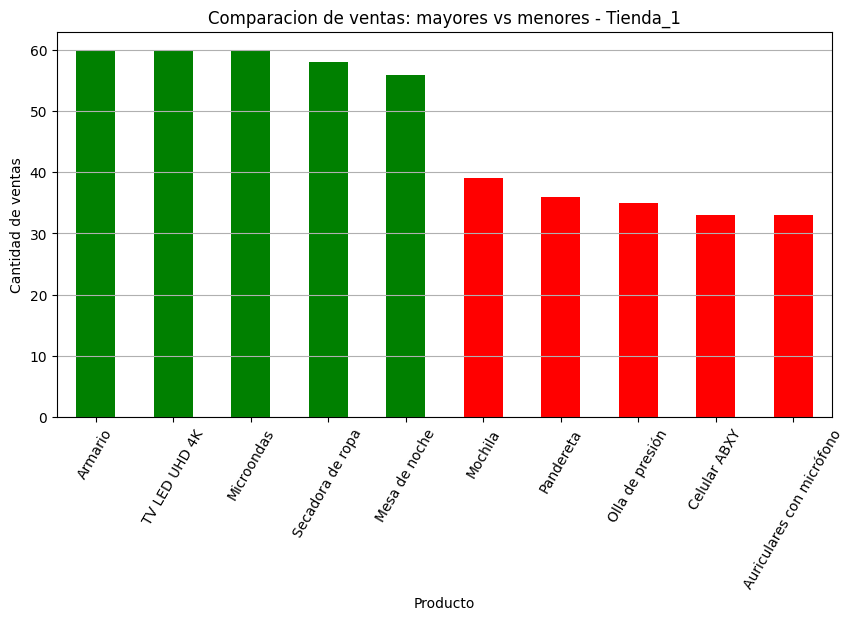

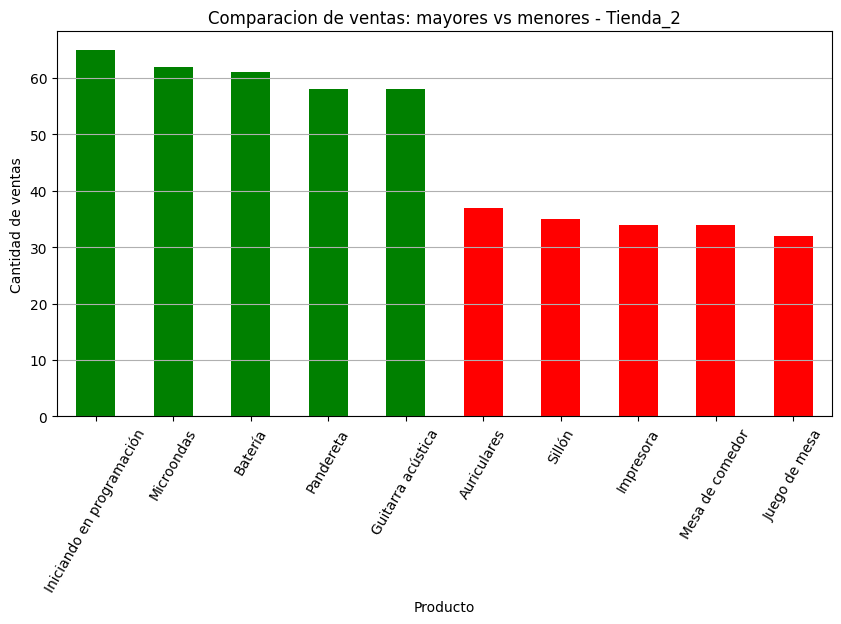

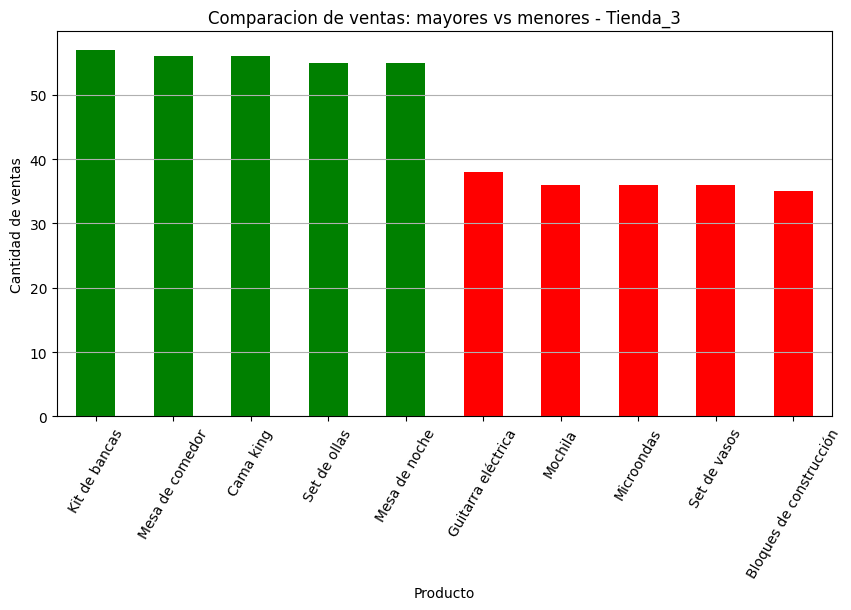

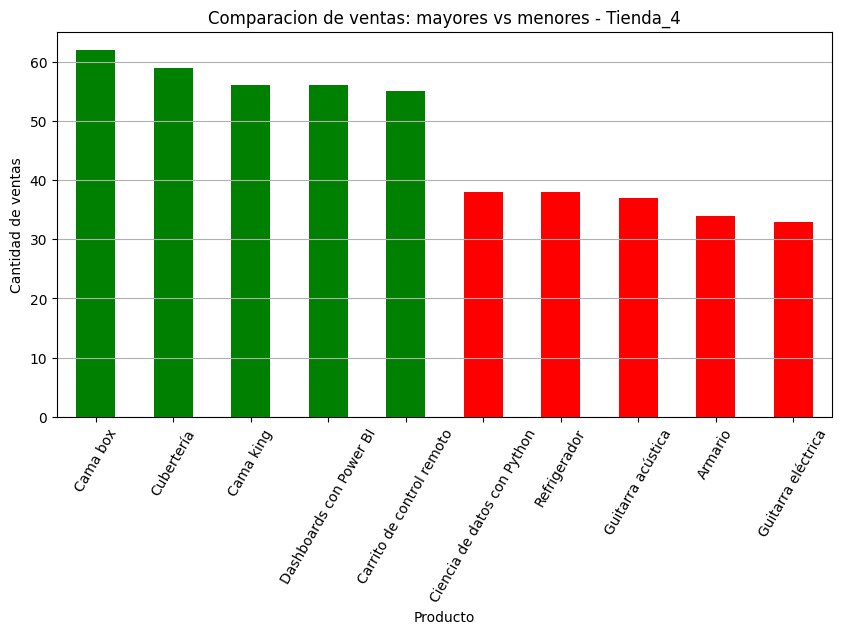

In [34]:
for nombre, df in tiendas.items():
  productosVendidos = df.groupby("Producto")["Precio"].count().sort_values(ascending=False)

  ##Más vendidos
  productoMasVendido = productosVendidos.index[0]
  ventasMasVendidas = productosVendidos.iloc[0]

  ##Producto menos vendido
  productoMenosVendido = productosVendidos.index[-1]
  ventasMenosVendidas = productosVendidos.iloc[-1]

  ##Comparacion
  mas = productosVendidos.head(5)
  menos = productosVendidos.tail(5)

  comparacion = pd.concat([mas,menos])

  plt.figure(figsize=(10,5))
  comparacion.plot(kind='bar',color=['green']*5+['red']*5)
  plt.title(f"Comparacion de ventas: mayores vs menores - {nombre}")
  plt.xlabel("Producto")
  plt.ylabel("Cantidad de ventas")
  plt.xticks(rotation=60)
  plt.grid(axis='y')
  plt.show()

# 5. Envío promedio por tienda

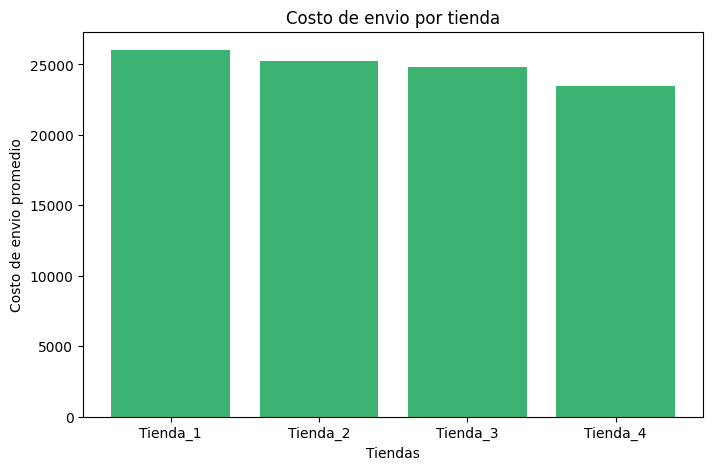

In [22]:
envioXTienda = {nombre: df["Costo de envío"].mean() for nombre, df in tiendas.items()}

plt.figure(figsize=(8,5))
plt.bar(envioXTienda.keys(),envioXTienda.values(),color='mediumseagreen')
plt.xlabel("Tiendas")
plt.ylabel("Costo de envio promedio")
plt.title("Costo de envio por tienda")
plt.show()

La tienda 4 presenta los menores ingresos, lo que sugiere que no genera suficiente volumen de ventas o que sus productos tienen precios más bajos en comparación con las otras tiendas.

Además, al observar que todas las tiendas tienen calificaciones similares, descartamos la posibilidad de que la baja facturación se deba a problemas de reputación o servicio al cliente.
